# Principal Component Analysis

O PCA é um dos métodos de aprendizado não-supervisionado mais utilizados para transformação de dados. É um algoritmo fundalmentalmente desenvolvido para redução de dimensionalidade, mas que também pode ser muito útil para visualização de dados, filtragem de ruido, extração de características e muito mais. Após uma discussão a respeito dos conceitos, nós veremos algumas aplicações desses conceitos.

Começamos por importar os pacotes necessários:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introdução ao PCA

PCA é um método não supervisionado rápido e flexível para redução de dimensionalidade em dados. Seu comportamento é fácil de ser visualizado quando observamos um dataset com 2 dimensões. Considere, por exemplo, os 200 pontos a seguir:

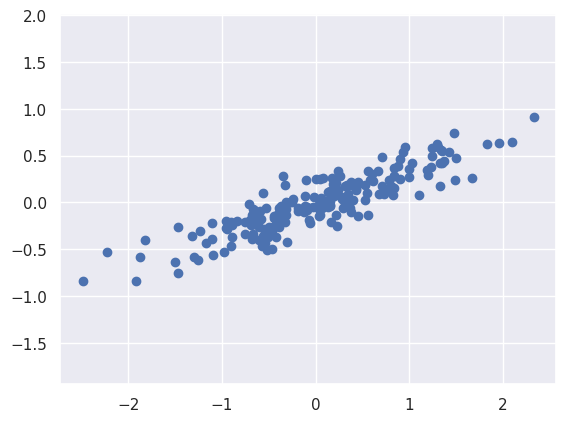

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Só de olhar fica claro que existe um relacionamento quase linear entre as variáveis $x$ e $y$. Apesar de lembrar o problema de regressão linear, em vez de tentar predizer os valores de $y$ com base em $x$, o aprendizado não supervisionado tenta aprender como funciona o relacionamento entre $x$ e $y$.

No PCA, esse relacionamento é quantificado atravéz de uma lista dos eixos principais dos dados, os quais são empregados para descrever o conjunto de dados. Podemos computar o PCA da seguinte maneira usando o Scikit-Learn:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

O ajuste aprende algumas métricas dos dados, como os "componentes" e a "variância explicada".

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [ ]:
np.sqrt(pca.explained_variance_)

array([0.8732305 , 0.13593342])

Para entender o que esses números querem dizer, podemos visualizá-los como vetores sobre os dados, usando os "componentes" para definir a direção do vetor, e a "variância explicada" para definir o comprimento (ao quadrado) do vetor:

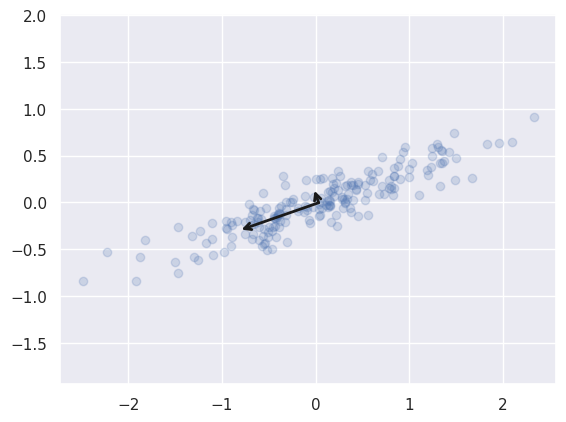

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,
                            color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plotar os dados
# plt.figure(figsize=(10, 8), dpi=300)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
#plt.ylim(-1,1)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1 * np.sqrt(length) # podemos alterar (didaticamente) para entender as componentes
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
#plt.show()

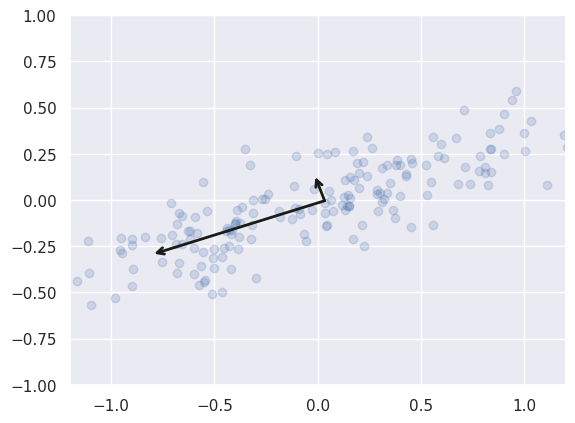

In [ ]:
# plotar os dados
# plt.figure(figsize=(10, 8), dpi=300)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.ylim(-1,1)
plt.xlim(-1.2,1.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.show()

Esses vetores representam os eixos principais dos dados, e o comprimento do vetor indica o quão "importante" esse eixo é para descrever precisamente a distribuição dos dados. É uma medida de variância dos dados quando projetados nesses eixos. A projeção de cada ponto nos eixos principais são os "componentes principais" dos dados.

Se plotarmos esses "componentes principais" ao lado dos dados originais, veremos os seguintes plots:

In [ ]:
pca.explained_variance_

array([0.7625315, 0.0184779])

[ 0.03351168 -0.00408072] [-0.82473153 -0.28696587]
[ 0.03351168 -0.00408072] [-0.0446712   0.12838372]


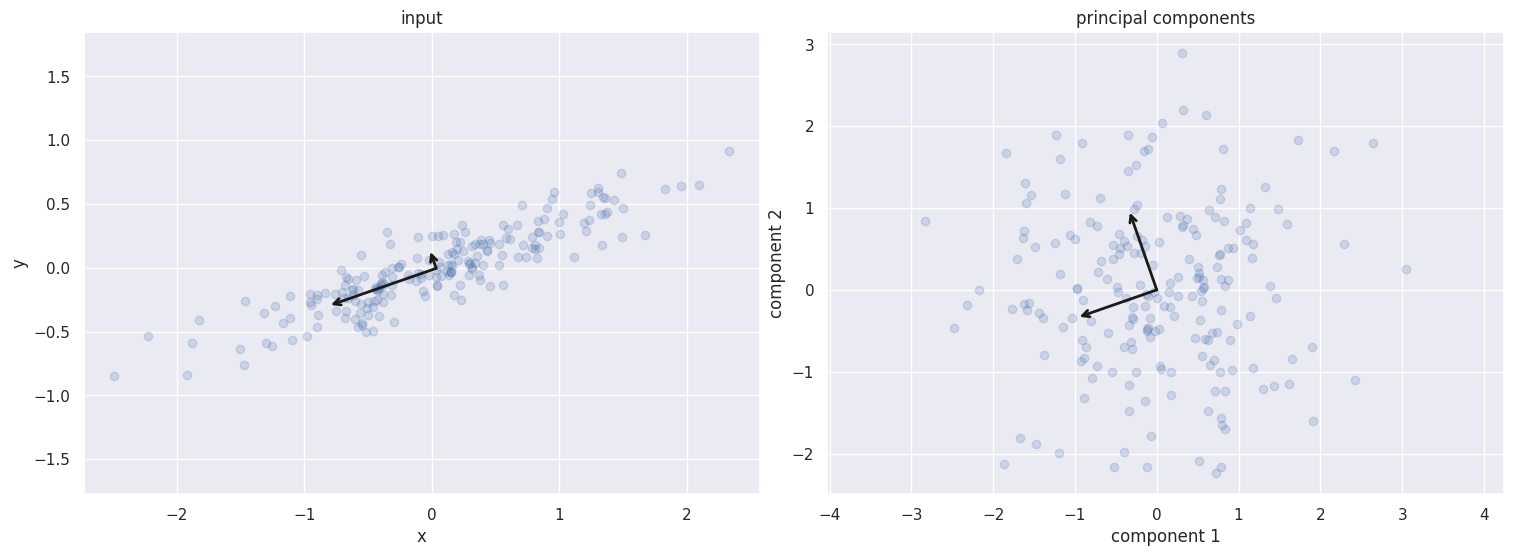

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True) # whiten normalization, tomem nota!
pca.fit(X)
# CIFAR 10
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plotando os dados
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1 * np.sqrt(length)
    print(pca.mean_, v)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plotando os componentes principais
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0,0], pca.components_[0], ax=ax[1])
draw_vector([0,0], pca.components_[1], ax=ax[1])
#for length, vector in zip(pca.explained_variance_, pca.components_):
    #v = vector * 1 *length#* np.sqrt(length)
    #draw_vector([0,vector[0]], [0, vector[1]], ax=ax[1])
#draw_vector([0, 0], [0, 3], ax=ax[1])
#draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components')#,xlim=(-5, 5), ylim=(-3, 3.1)
plt.show()

Essa transformação do eixo dos dados para os eixos principais é chamada de _affine_, a qual é basicamente composta por translação, rotação e escala uniforme.

Embora esse algoritmo para encontrar os principais componentes possa parecer apenas uma curiosidade matemática, ele tem aplicações de longo alcance no mundo da aprendizagem de máquinas e exploração dos dados.

## PCA para redução de dimensionalidade

Usar o PCA para redução de dimensionalidade envolve zerar um ou mais dos menores componentes principais, resultando em uma projeção de menor dimensionalidade dos dados que preserve a variância máxima.

Aqui temos um exemplo de como usar o PCA como uma transformação para redução de dimensionalidade:

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Os dados transformados foram reduzidos para uma única dimensão. Para entender o efeito dessa redução de dimensionalidade, podemos executar a transformada inversa dessa redução de dados e plotá-la com os dados originais:

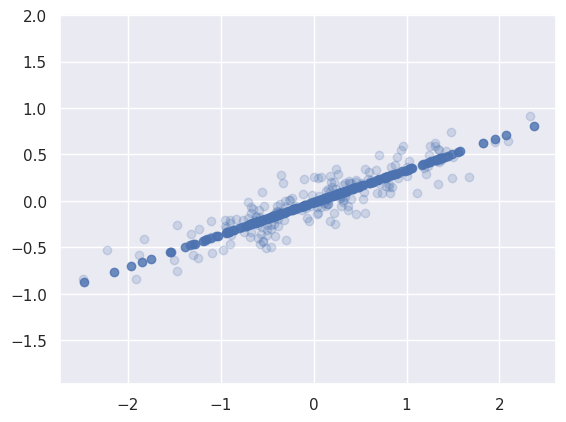

In [ ]:
X_new = pca.inverse_transform(X_pca)
# plt.figure(figsize=(10, 8), dpi=300)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, c='b')
plt.axis('equal');

Os pontos mais claros representam os dados originais, enquanto os pontos mais escuros representam a versão projetada (transformada). O plot deixa claro o que a redução de dimensionalidade do PCA significa: a informação distribuida pelos eixos menos importantes é removida, deixando apenas a componente dos dados com maior variância. A porção de variância que é removida é mais ou menos proporcional à medida de quanta "informação" é descartada nessa redução de dimensionalidade.

Esse dataset com dimensão reduzida é de certa forma "bom o suficiente" para representar os relacionamentos mais importantes entre os pontos: apesar de reduzir as dimensões dos dados em 50%, a maior parte do relacionamento geral entre os dados é preservada.

## PCA para visualização

A utilidade da redução de dimensionalidade pode não ser tão aparente em apenas 2 dimensões, mas se torna muito mais clara quando observamos dados com dimensionalidades muito mais altas. Como exemplo, podemos analisar uma aplicação de PCA para o dataset _Digits_.

Vamos começar carregando os dados:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Lembrem-se que os dados são compostos por imagens de 8x8 pixels, o que significa um conjunto de dados com 64 dimensões. Para termos uma ideia do relacionamento entre esses pontos, podemos usar o PCA para projetá-los em um espaço de dimensões mais fácil de "manusear", como por exemplo 2 dimensões:

In [ ]:
# projetamos os dados de um espaço de 64 para 2 dimensões:

pca = PCA(2)
projected = pca.fit_transform(digits.data)
print("Banco de dados original: ",digits.data.shape)
print("Banco de dados transformado: ",projected.shape)

Banco de dados original:  (1797, 64)
Banco de dados transformado:  (1797, 2)


Agora podemos plotar os dois componentes principais de cada ponto e aprender sobre os dados:

<ipython-input-15-a3aaf28aa525>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


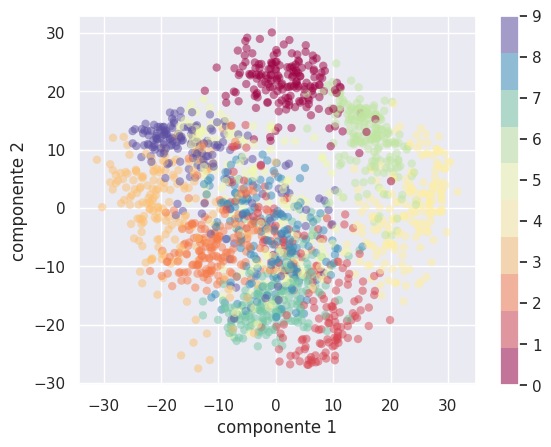

In [ ]:
# plt.figure(figsize=(10, 8), dpi=300)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar();

Lembrando o que esses componentes significam...

Os dados completos são uma "nuvem de pontos" de dimensão 64, e esses pontos são a projeção de cada ponto nas direções com maior variância. O que o PCA fez foi encontrar a rotação e o "esticamento" ótimo do espaço de 64 dimensões para uma projeção em 2 dimensões, de forma não supervisionada, sem referência aos rótulos.

# O que significam esses componentes?

Podemos ir um pouco mais a fundo, e nos perguntarmos o que significa a redução de dimensões. O significado pode ser entendido em termos de combinação de vetores. Como exemplo, cada imagem no conjunto de treinamento é definida por uma coleção de 64 valores de pixels, as quais chamamos de vetor $x$:

\begin{equation}
x=[x_1,x_2,x_3,\dots,x_{64}]
\end{equation}

Imaginando o exemplo do pixel, poderiamos construir uma imagem multiplicando cada elemento do vetor pelo pixel que ele descreve, e depois somar o resultado para construir a imagem:

\begin{equation}
image(x)=x_1\cdot(pixel 1)+x_2\cdot(pixel 2)+x_3\cdot(pixel 3),\dots,x_{64}\cdot(pixel 64)
\end{equation}

Um jeito que poderiamos imaginar de reduzir a dimensão seria zerar todas as bases do vetor exceto algumas. Por exemplo, se usássemos apenas os 8 primeiros pixels, teriamos uma projeção dos dados, mas que não reflete muito o conteúdo da imagem: jogariamos fora 90% dos pixels!
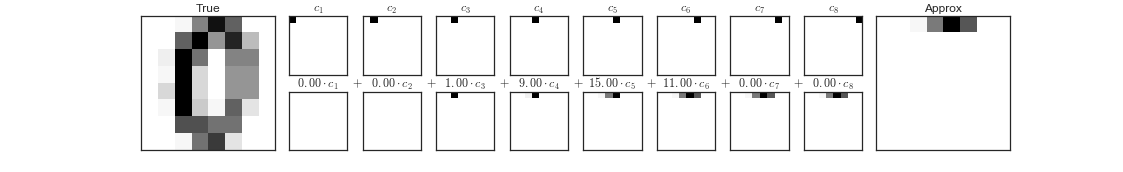


A linha de cima mostra os pixels individuais, e a de baixo mostra a distribuição cumulativa desses pixels para reconstruir a imagem. Usando apenas oito componentes de pixels, podemos reconstruir apenas uma pequena porção da imagem de 64 pixels. Para reconstruir toda a imagem com essa abordagem, precisariamos de todos os 64 pixels.

Mas a abordagem de representação baseada em pixels não é a unica escolha possível. Podemos também considerar outras funções de base, as quais contém algumas contribuições pré-definidas de cada pixel, e podem ser escritas mais ou menos como da forma a seguir:

\begin{equation}
image(x)=mean+x_1\cdot(basis 1)+x_2\cdot(basis 2)+x_3\cdot(basis 3)\dots
\end{equation}

O PCA pode ser visualizado como um processo de escolha de funções de base ótimas, de modo que somando algumas das primeiras delas seja suficiente para reconstruir a estrutura dos elementos no dataset. Os componentes principais funcionam como uma representação dos dados em uma dimensionalidade menor, e são simplesmente os coeficientes que multiplicam cada um desses elementos nessa série. A figura abaixo mostra uma imagem similar a de cima, onde o dígito é reconstruído usando a média mais as 8 primeiras funções de base do PCA:

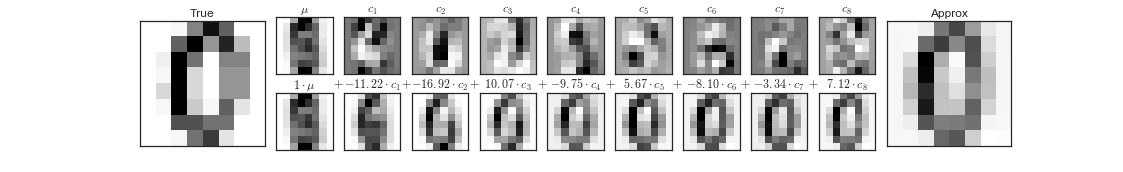

Diferente da base em pixels, as funções de base do PCA permiter reconstruir as características mais salientes dos dados de entrada apenas com uma média mais oito componentes! A quantidade de pixels em cada componente é deduzida da orientação do vetor no exemplo em 2 dimensões. Esse é o sentido no qual o PCA proporciona uma representação de baixa dimensionalidade dos dados: ele descobre um conjunto de funções de base que são mais eficientes do que a representação em pixels dos dados de entrada.

## Escolhendo o número de componentes

Uma parte vital do PCA na prática é a habilidade de estimar quantos componentes são necessários para descrever os dados. Isso pode ser determinado olhando a razão da variância explicada cumulativa como uma função do número de componentes:

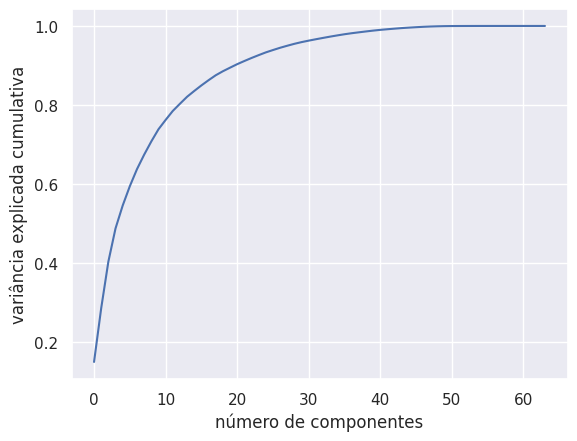

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('variância explicada cumulativa');

Essa curva quantifica quanto do total da variância das 64 dimensões estão contidas nos $N$ primeiros componentes. Como exemplo, podemos ver que os primeiros 10 componentes são responsáveis por aproximadamente 75% da variância, enquanto precisamos de aproximadamente 50 componentes para uma variância de 100%.

Aqui podemos ver que nossa projeção bi-dimensional perde muita informação (medida pela variância explicada) e que precisamos de aproximadamente 20 componentes para manter 90% da variância. Olhar para o plot de um dataset de dimensão grande ajuda a compreender o **nível de redundância presente nos dados**.

## PCA para filtragem de ruídos

O PCA também pode ser usado para filtrar ruídos nos dados.

A ideia é a seguinte: Qualquer componente com variância muito maior que o efeito do ruído deve sofrer muito pouco com o efeito do ruído. Então se reconstruirmos os dados usando apenas o maior subconjunto dos componentes principais, estaremos dando preferência para o sinal e jogando fora o ruído!

Vamos ver como funciona com o dataset _digits_. Primeiramente, iremos plotar diversas amostras sem ruído:

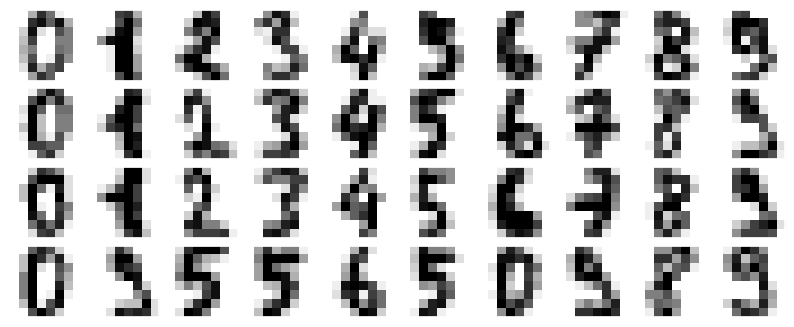

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Agora vamos criar um novo conjunto de dados adicionando ruído e plotando novamente:

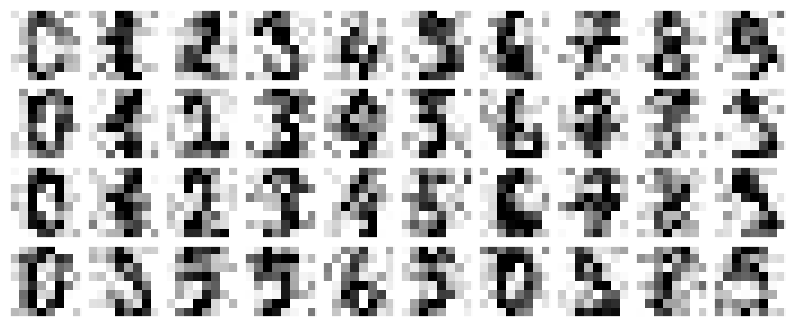

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Fica muito claro que as imagens são ruidosas, e contém pixels deformados.

Vamos treinar o PCA sobre os dados ruidosos, mantendo uma projeção com 50% da variância:

In [ ]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

Podemos ver que 50% da variância representa 12 dos principais componentes.

Agora que temos esses componentes, podemos usá-los para computar a transformada inversa e reconstruir os dígitos filtrados:

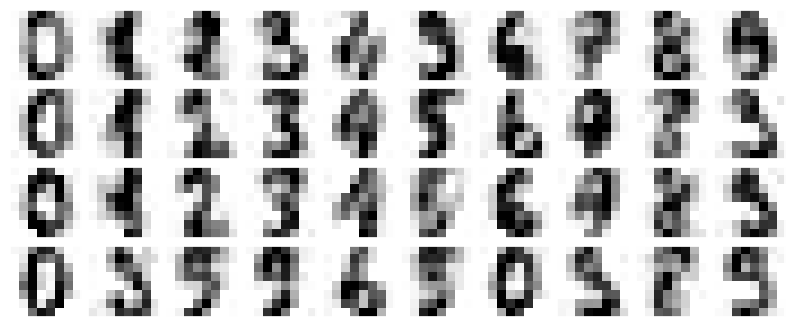

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Essa propriedade de preservação do sinal/filtragem faz do PCA uma técnica muito útil de seleção de características. Como exemplo, em vez de treinar um classificador sobre um conjunto de dados de alta dimensionalidade, podemos treinar um classificador sobre uma representação de dimensionalidade bem menor, a qual pode servir automaticamente para filtrar o ruído aleatório nas amostras de entrada.

## Examplo: _Eigenfaces_ - Reconhecimento facial

Na aula de SVM nós vimos como explorar o PCA para selecionar as características para tarefa de reconhecimento facial. Agora vamos explorar um pouco melhor o que acontece. Vamos usar o dataset Faces in the Wild.

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Vamos dar uma olhada nos eixos principais que espalham o dataset. Por ser um dataset grande, nós usaremos o RandomizedPCA - que contém um método randomizado para aproximar os primeiros $N$ componentes principais de forma muito mais rápida que o PCA tradicional, e assim, é muito útil para dados de alta dimensionalidade (aqui, uma dimensionalidade de aproximadamente 3,000). Vamos dar uma olhada nos primeiros 150 componentes:

In [ ]:
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

Nesse caso, pode ser interessante visualizar as imagens associadas com os primeiros componentes principais (esses componentes são tecnicamente chamados de autovetores, então, esses tipos de imagens são, com frequencia, chamados "eigenfaces"). Como podemos ver na figura abaixo, essas imagens são um tanto quanto estranhas:

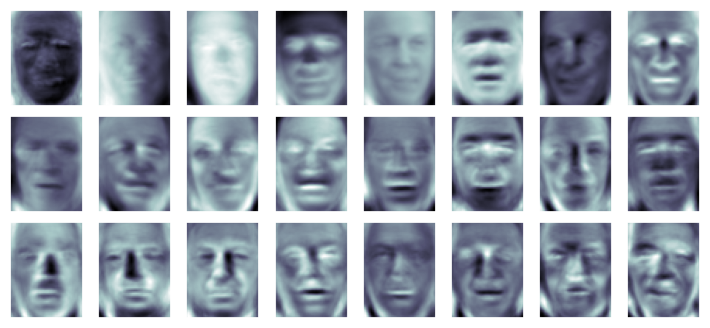

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Os resultados são bem interessantes, e nos dão algumas ideias sobre como essas imagens variam. Por exemplo, as primeiras _eigenfaces_ (no topo à esquerda) parecem estar associadas com o ângulo de iluminação da face, enquanto  os próximos vetores principais parecem extrair algumas características específicas, como os olhos, narizes, e lábios.

Vamos dar uma olhada na variância cumulativa desses componentes e ver quanta informação a projeção pode preservar:

In [ ]:
a = np.concatenate((np.repeat(80,10).reshape(-1,1), np.arange(0,1,0.1).reshape(-1,1)),axis=1)#.reshape((10,2))

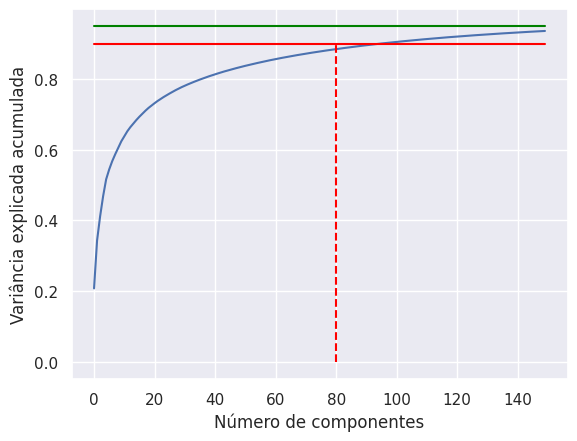

In [ ]:
# plt.figure(figsize=(10, 8), dpi=300)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(0.9*np.ones(150), color='red')
plt.plot(a[:,0], a[:,1], '--', color='red')
plt.plot(0.95*np.ones(150), color='green')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada acumulada')
plt.show()

Podemos ver que os 150 componentes são capaz de representar mais de 90% da variância. Isso nos leva a acreditar que usando esses 150 podemos recuperar a maior parte das características essenciais dos dados. Para deixar mais concreto, podemos comparar a imagem de entrada com as imagens reconstruidas a partir desses 150 componentes:

In [ ]:
# Computa os componentes mais importantes e projeta as faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

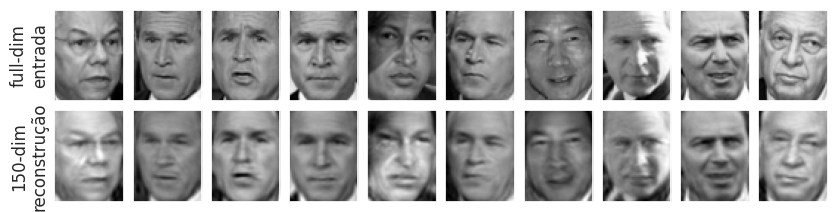

In [ ]:
# Plota os resultados

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
#plt.figure(figsize=(10, 8), dpi=300)
ax[0, 0].set_ylabel('full-dim\nentrada')
ax[1, 0].set_ylabel('150-dim\nreconstrução');

A linha de cima mostra as imagens de entrada, enquanto as imagens de baixo mostram a reconstrução das imagens  usando apenas 150 das aproximadamente 3,000 características iniciais. Essa visualização deixa claro o porque a seleção de características usando PCA é bem sucedida: embora reduza a dimensionalidade em aproximadamente 20 vezes, as imagens projetadas contêm informação suficiente para que possamos, só de olhar, reconhecer os indivíduos nas imagens. O que significa é que nosso algoritmo de classificação precisa ser treinado sobre um conjunto de dados com 150 dimensões em vez de 3,000. Dependendo do algoritmo de classificação, essa mudança pode levar a uma classificação muito mais eficiente.

## Conclusão

Nesta aula nós discutimos o uso do PCA para a redução de dimensionalidade, visualização de dados de alta dimensionalidade, filtragem de ruídos e para seleção de características de dados de alta dimensionalidade. Por causa da versatilidade e interpretabilidade do PCA, foi mostrado que a técnica é efetiva em uma grande variedade de contextos e problemas.

Dado qualquer conjunto de dados de alta dimensionalidade, o PCA permite visualizar o relacionamento entre os pontos (como fizemos com os dígitos), entender a variância dos dados (como fizemos com as _eigenfaces_ ), e entender a dimensionalidade intrínsica (plotando a razão da variância explicada). Com certeza, o PCA pode não ser útil para todos os datasets com alta dimensionalidade, mas ele oferece uma maneira simples e eficiente de obter _insights_ sobre esses dados.

A maior fraqueza do PCA é que ele tende a ser altamente impactado por anomalias nos dados. Sendo assim, algumas variantes do PCA foram desenvolvidas para tentar mitigar esse problema, agindo geralmente para descartar de modo iterativo os pontos que são descritos de maneira mais pobre pelos componentes iniciais.

O Scikit-learn contém algumas dessas variantes, como o `RandomizedPCA`, que usa um método não-determinístico para aproximar rápidamente os principais componentes em dados com dimensão muito altas, e o `SparsePCA`, que introduz um termo de regularização que serve para forçar a esparsidade dos componentes.